In [39]:
!pip3 install setuptools
!pip3 install wheel
!pip3 install matplotlib
!pip3 install "numpy<1.17"

  ERROR: Could not find a version that satisfies the requirement PIL (from versions: none)
ERROR: No matching distribution found for PIL


In [ ]:
import tensorflow as tf
import os
import zipfile
from os import path, getcwd, chdir

# DO NOT CHANGE THE LINE BELOW. If you are developing in a local
# environment, then grab happy-or-sad.zip from the Coursera Jupyter Notebook
# and place it inside a local folder and edit the path to that location
path = f"{getcwd()}/happy-or-sad.zip"

zip_ref = zipfile.ZipFile(path, 'r')
zip_ref.extractall("/tmp/h-or-s")
zip_ref.close()

In [18]:
train_happy_dir = os.path.join('/tmp/h-or-s/happy')
train_sad_dir   = os.path.join('/tmp/h-or-s/sad')

train_happy_names = os.listdir(train_happy_dir)
print(train_happy_names)
train_sad_names   = os.listdir(train_sad_dir)
print(train_sad_names)

['happy1-18.png', 'happy2-07.png', 'happy1-01.png', 'happy2-12.png', 'happy1-02.png', 'happy2-01.png', 'happy1-04.png', 'happy1-06.png', 'happy2-10.png', 'happy2-15.png', 'happy2-02.png', 'happy1-03.png', 'happy1-05.png', 'happy2-11.png', 'happy2-06.png', 'happy1-10.png', 'happy2-09.png', 'happy2-03.png', 'happy2-04.png', 'happy1-13.png', 'happy1-11.png', 'happy2-18.png', 'happy1-17.png', 'happy1-16.png', 'happy2-05.png', 'happy1-08.png', 'happy2-17.png', 'happy1-14.png', 'happy2-16.png', 'happy2-00.png', 'happy1-15.png', 'happy1-07.png', 'happy1-09.png', 'happy2-14.png', 'happy1-19.png', 'happy2-19.png', 'happy2-08.png', 'happy1-12.png', 'happy2-13.png', 'happy1-00.png']
['sad2-18.png', 'sad2-17.png', 'sad1-02.png', 'sad2-06.png', 'sad2-09.png', 'sad2-02.png', 'sad1-17.png', 'sad2-01.png', 'sad1-12.png', 'sad1-15.png', 'sad1-09.png', 'sad2-11.png', 'sad1-10.png', 'sad1-08.png', 'sad1-16.png', 'sad2-00.png', 'sad2-05.png', 'sad1-18.png', 'sad2-10.png', 'sad2-15.png', 'sad2-13.png', 'sa

In [27]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# graph params
nrows     = 2
ncols     = 5
pic_index = 0

fig = plt.gcf()
fig.set_size_inches(ncols * 2, nrows * 2)


<Figure size 720x288 with 0 Axes>

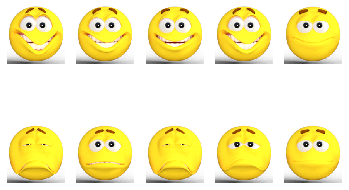

In [35]:
# re-reun this batch to go to the next images
pic_index += 5
next_happy_pix = [os.path.join(train_happy_dir, fname) 
                for fname in train_happy_names[pic_index-5:pic_index]]
next_sad_pix  = [os.path.join(train_sad_dir, fname) 
                for fname in train_sad_names[pic_index-5:pic_index]]

for i, img_path in enumerate(next_happy_pix+next_sad_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

In [37]:
import tensorflow as tf

model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 300x300 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(300, 300, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fifth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('horses') and 1 for the other ('humans')
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.summary()

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 298, 298, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 149, 149, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 147, 147, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 73, 73, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 71, 71, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 35, 35, 64)        0         
____

In [38]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=0.001),
              metrics=['acc'])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1/255)
validation_datagen = ImageDataGenerator(rescale=1/255)

# Flow training images in batches of 128 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        '/tmp/h-s/',  # This is the source directory for training images
        target_size=(300, 300),  # All images will be resized to 150x150
        batch_size=128,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

# Flow training images in batches of 128 using train_datagen generator
validation_generator = validation_datagen.flow_from_directory(
        '/tmp/validation-horse-or-human/',  # This is the source directory for training images
        target_size=(300, 300),  # All images will be resized to 150x150
        batch_size=32,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

In [ ]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=8,  
      epochs=15,
      verbose=1,
      validation_data = validation_generator,
      validation_steps=8)

In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = '/content/' + fn
  img = image.load_img(path, target_size=(300, 300))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(classes[0])
  if classes[0]>0.5:
    print(fn + " is a human")
  else:
    print(fn + " is a horse")
